<a name='0'></a>
# Gold Price Forcasting
In this task we are going to predict gold price using ARIMA and Long Short-Term Memory Algorithms.

Contents:

* [1. Imports](#1)
* [2. Loading the Dataset](#2)
* [3. Quick Look into the dataset](#3)
* [4. ARIMA - Auto Regressive Integrated Moving Average](#4)
* [5.  Predicting the price using Long short-Term Memory (only one feature)](#5)

<a name='1'></a>
## 1. **Imports**

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore")

<a name='2'></a>
## **2. Loading the Dataset**

In [3]:
df = pd.read_csv('./XAUUSD.csv')
df

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,7/4/2023 0:00,1921.07,1930.22,1920.34,1929.65,858,0.44
1,7/3/2023 0:00,1917.70,1930.50,1910.11,1921.17,347,0.18
2,7/2/2023 0:00,1920.30,1920.30,1917.50,1917.70,-260,-0.14
3,6/30/2023 0:00,1908.71,1922.61,1900.57,1919.20,1049,0.55
4,6/29/2023 0:00,1909.47,1913.00,1893.16,1908.76,-71,-0.04
...,...,...,...,...,...,...,...
617,7/8/2021 0:00,1803.29,1818.00,1793.90,1803.75,46,0.03
618,7/7/2021 0:00,1795.28,1809.50,1793.41,1803.22,794,0.44
619,7/6/2021 0:00,1790.85,1814.89,1789.89,1795.68,483,0.27
620,7/5/2021 0:00,1786.68,1794.00,1783.80,1791.15,447,0.25


<a name='3'></a>
## **3. Quick Look into the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          622 non-null    object 
 1   Open          622 non-null    float64
 2   High          622 non-null    float64
 3   Low           622 non-null    float64
 4   Close         622 non-null    float64
 5   Change(Pips)  622 non-null    int64  
 6   Change(%)     622 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 34.1+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,1833.470354,1844.208939,1822.538248,1833.592749,12.239550,0.003617
std,94.417731,95.163303,93.223079,94.345885,1480.617616,0.804528
min,1627.270000,1640.760000,1615.040000,1626.890000,-5559.000000,-3.050000
25%,1775.080000,1787.085000,1765.435000,1774.957500,-704.000000,-0.380000
50%,1815.230000,1826.375000,1808.335000,1815.470000,11.500000,0.005000
75%,1913.792500,1924.717500,1896.670000,1914.700000,749.500000,0.410000
max,2052.780000,2071.320000,2030.770000,2051.930000,6612.000000,3.330000


In [6]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Change(Pips)      int64
Change(%)       float64
dtype: object

In [7]:
# Convert Date to datetime, because it's Object type
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,2023-07-04,1921.07,1930.22,1920.34,1929.65,858,0.44
1,2023-07-03,1917.70,1930.50,1910.11,1921.17,347,0.18
2,2023-07-02,1920.30,1920.30,1917.50,1917.70,-260,-0.14
3,2023-06-30,1908.71,1922.61,1900.57,1919.20,1049,0.55
4,2023-06-29,1909.47,1913.00,1893.16,1908.76,-71,-0.04
...,...,...,...,...,...,...,...
617,2021-07-08,1803.29,1818.00,1793.90,1803.75,46,0.03
618,2021-07-07,1795.28,1809.50,1793.41,1803.22,794,0.44
619,2021-07-06,1790.85,1814.89,1789.89,1795.68,483,0.27
620,2021-07-05,1786.68,1794.00,1783.80,1791.15,447,0.25


In [8]:
# Convert Object to datetime
df['Date']= pd.to_datetime(df['Date'])
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Change(Pips)             int64
Change(%)              float64
dtype: object

### Plot the Gold Price Chart

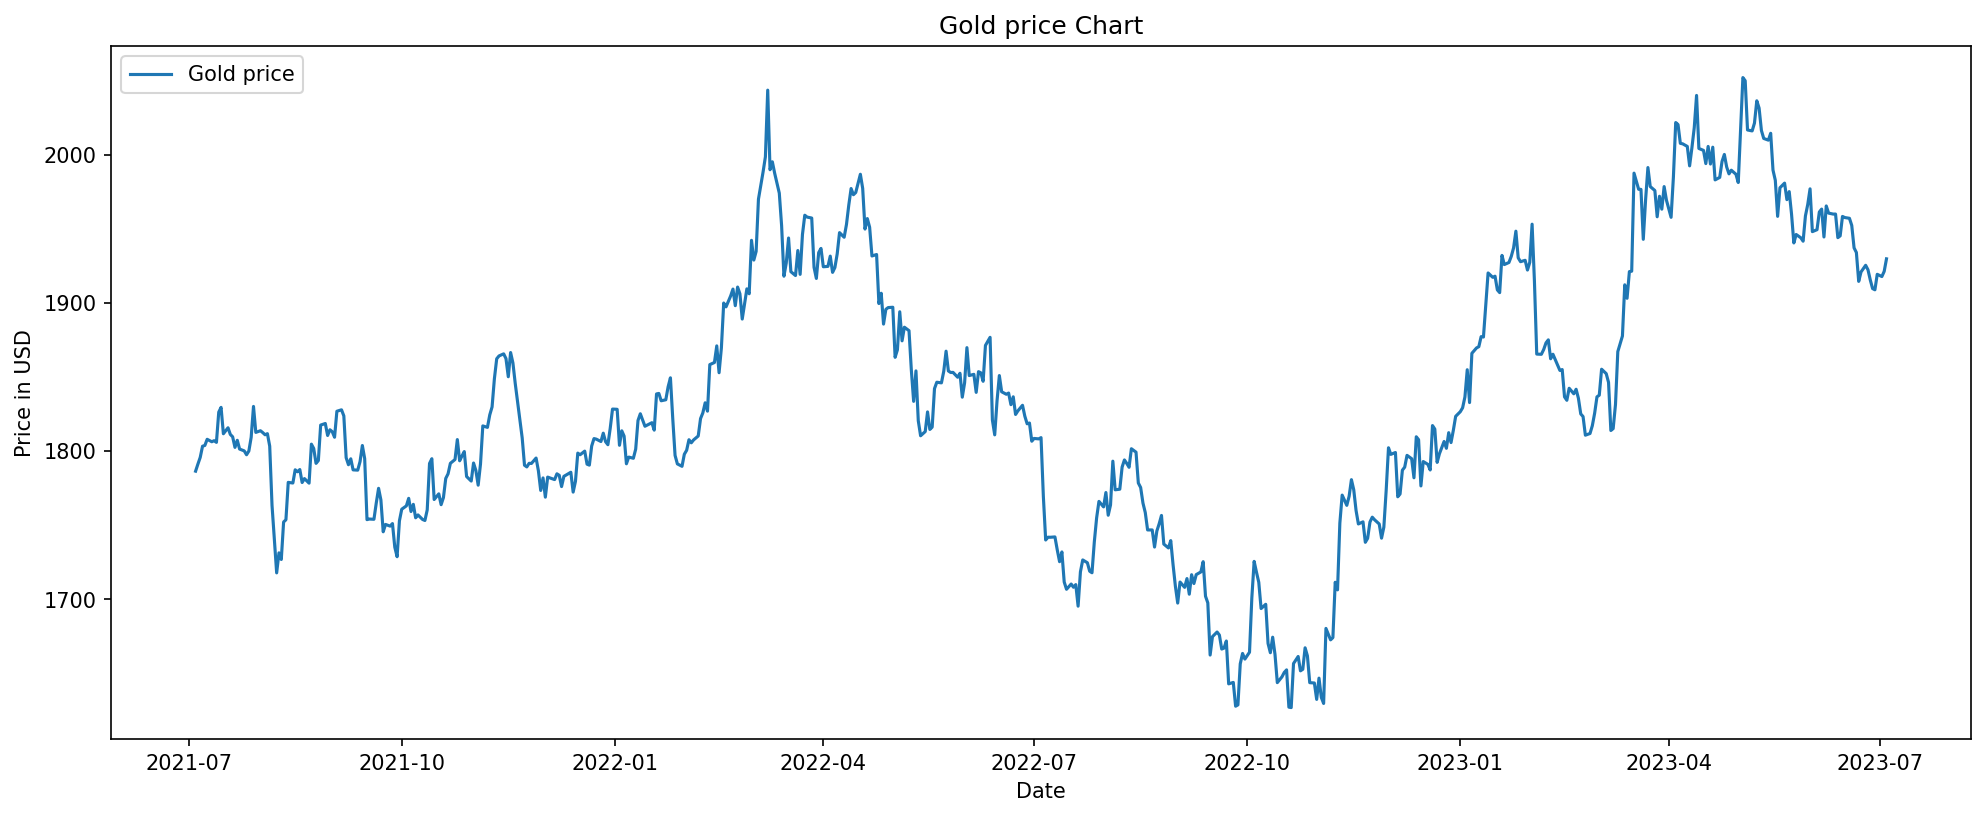

In [9]:
plt.figure(figsize=(16, 6), dpi=150)
plt.plot(df['Date'], df['Close'], label='Gold price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Gold price Chart')
plt.legend(loc=2)
plt.savefig('Gold price Chart.jpg')
plt.show()

<a name='4'></a>
## **4. ARIMA - Auto Regressive Integrated Moving Average**

### **ARIMA has three parameters**

**(p):** The number of lag observations

**(d):** Differencing of observations

**(q):** The size of the moving average window


We will only use one Variable called "Close" which stands for Daily Closing price of Gold in USD for ARIMA Model
<br/><br/>


In [10]:
past_value = df['Close']
model = ARIMA(past_value, order=(2, 0, 3)) # p, d and q parameters are obtained manually which have better performance
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  622
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -2554.141
Date:                Thu, 01 Feb 2024   AIC                           5122.281
Time:                        22:38:07   BIC                           5153.312
Sample:                             0   HQIC                          5134.341
                                - 622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1833.5943     42.052     43.603      0.000    1751.174    1916.015
ar.L1          1.7897      0.314      5.693      0.000       1.174       2.406
ar.L2         -0.7924      0.311     -2.552      0.0

<a name='5'></a>
### **Train the Data with ARIMA**

In [11]:
past_value = df['Close']
X = past_value.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for i in range(len(test)):
    model = ARIMA(history, order = (2,0,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    predictions.append(output)
    new = test[i]
    history.append(new)


### **Evaluate the Arima Model**

In [12]:
print('ARIMA Model MAE = ', mean_absolute_error(test, predictions))

ARIMA Model MAE =  8.610308985668002


### Plot real price values and predicted values by ARIMA 

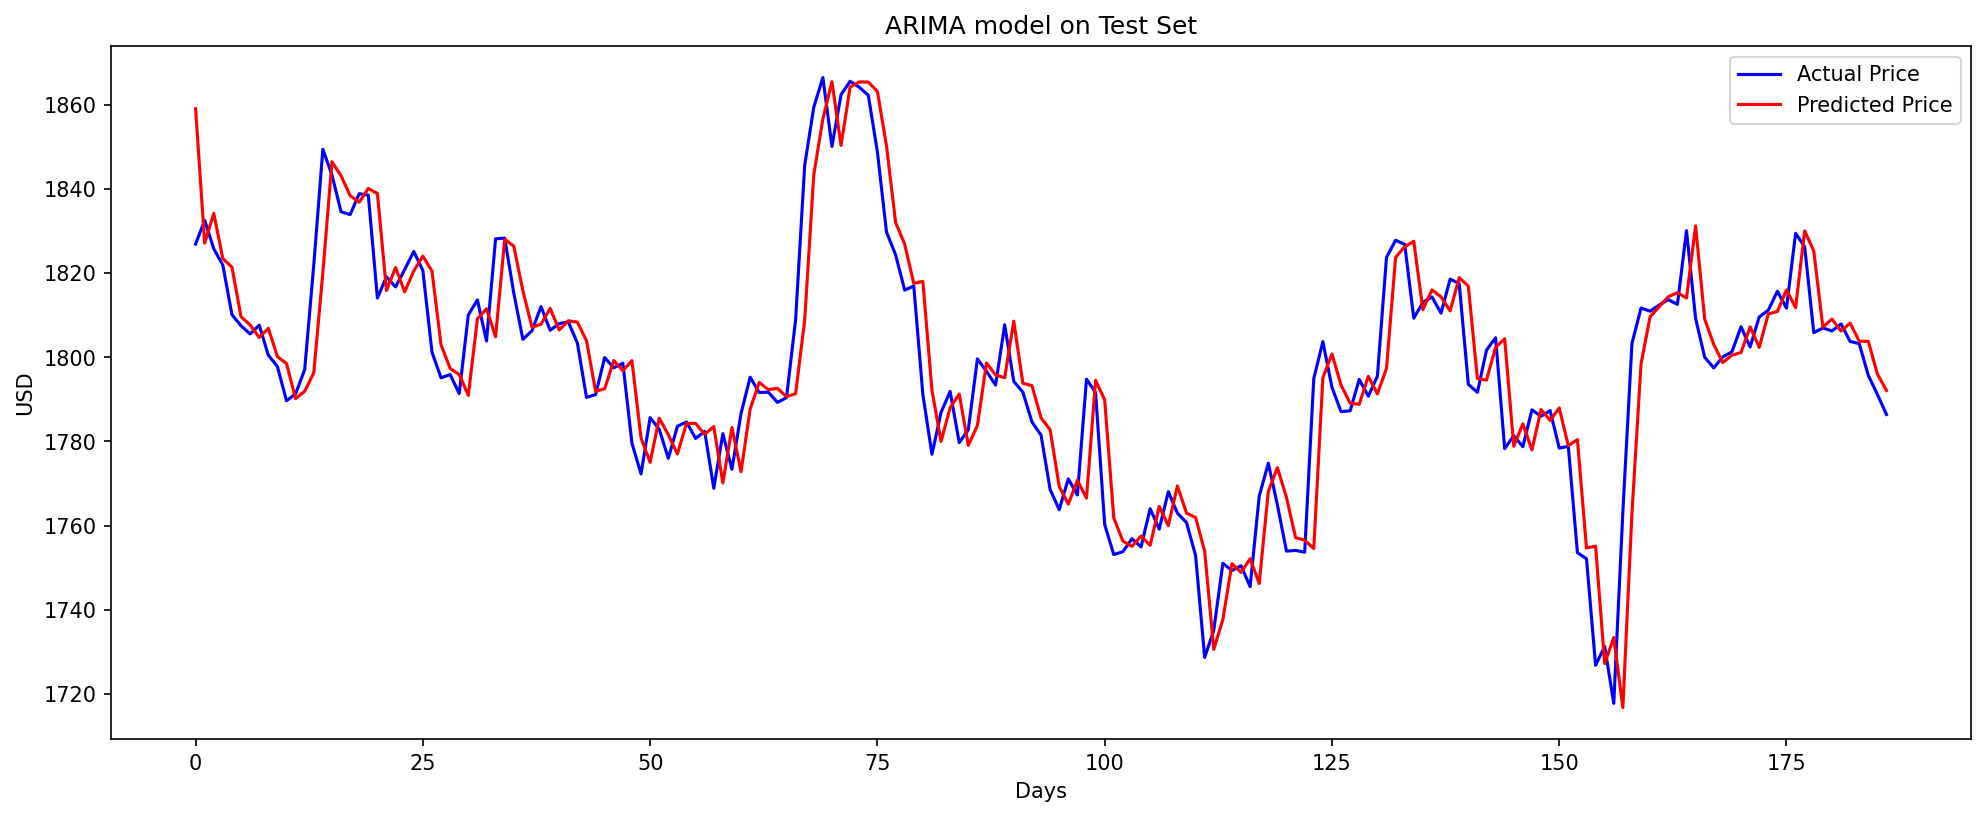

In [13]:

plt.figure(figsize=(16, 6), dpi=150)
plt.plot(test, color='Blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('ARIMA model on Test Set')
plt.savefig('ARIMA Model Predictions on Test Set.jpg')
plt.legend()
plt.show()

<a name='5'></a>
## **5. Predicting the price using Long short-Term Memory (Only one feature)**

**LSTM is great at predicting stock market data. We are going to try to predict the closing prices.**

In [14]:
lstm_df = df[['Close', 'High', 'Low']]
lstm_df

,Close,High,Low
0,1929.65,1930.22,1920.34
1,1921.17,1930.50,1910.11
2,1917.70,1920.30,1917.50
3,1919.20,1922.61,1900.57
4,1908.76,1913.00,1893.16
...,...,...,...
617,1803.75,1818.00,1793.90
618,1803.22,1809.50,1793.41
619,1795.68,1814.89,1789.89
620,1791.15,1794.00,1783.80


In [15]:
lstm_df.shape

(622, 3)

## Test, Train and Validation sets
We need to transform our data into X and Y values.

In [16]:
train, validation, test = np.split(lstm_df, [int(len(lstm_df) * 0.6), int(len(lstm_df) * 0.8)])

In [17]:
train.shape, validation.shape, test.shape

((373, 3), (124, 3), (125, 3))

In [18]:
close_train = train.iloc[:, 0:1].values
close_val= validation.iloc[:, 0:1].values
close_test = test.iloc[:, 0:1].values

### Normalising the data using min-max scalar

In [19]:
scaler = MinMaxScaler()
scaled_close_train = scaler.fit_transform(close_train)
scaled_close_val = scaler.transform(close_val)
scaled_close_test = scaler.transform(close_test)

In [20]:
def data_to_table(data, sequence_size):
    x = []
    y = []

    for i in range(len(data) - sequence_size):
        window = data[i:(i + sequence_size), 0]
        x.append(window)
        y.append(data[i + sequence_size, 0])
        
    return pd.DataFrame(x), pd.DataFrame(y)

In [21]:
train_data = data_to_table(scaled_close_train, 3)
val_data = data_to_table(scaled_close_val, 3)
test_data = data_to_table(scaled_close_test, 3)

In [22]:
x_train = np.array(train_data[0])
y_train = np.array(train_data[1])
x_val = np.array(val_data[0])
y_val = np.array(val_data[1])
x_test = np.array(test_data[0])
y_test = np.array(test_data[1])

In [23]:
x_train.shape, y_train.shape

((370, 3), (370, 1))

In [24]:
train_x = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
val_x = np.reshape(x_val, (x_val.shape[0],x_val.shape[1], 1))


### **LSTM Model**

In [41]:
model = Sequential()
model.add(LSTM(16, input_shape = (3, 1), activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 16)                1152      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_absolute_error')

In [43]:
early_stopping = EarlyStopping(monitor = 'loss', patience = 4)

In [44]:
history = model.fit(train_x, y_train, epochs = 150, batch_size = 32, validation_data = (val_x, y_val), callbacks=[early_stopping])

Epoch 1/150
12/12 [==============================] - 2s 30ms/step - loss: 0.2400 - mean_absolute_error: 0.4316 - val_loss: 0.2563 - val_mean_absolute_error: 0.4832
Epoch 2/150
12/12 [==============================] - 0s 6ms/step - loss: 0.2071 - mean_absolute_error: 0.3974 - val_loss: 0.2206 - val_mean_absolute_error: 0.4464
Epoch 3/150
12/12 [==============================] - 0s 6ms/step - loss: 0.1775 - mean_absolute_error: 0.3640 - val_loss: 0.1865 - val_mean_absolute_error: 0.4082
Epoch 4/150
12/12 [==============================] - 0s 6ms/step - loss: 0.1496 - mean_absolute_error: 0.3306 - val_loss: 0.1539 - val_mean_absolute_error: 0.3686
Epoch 5/150
12/12 [==============================] - 0s 7ms/step - loss: 0.1226 - mean_absolute_error: 0.2969 - val_loss: 0.1232 - val_mean_absolute_error: 0.3268
Epoch 6/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0970 - mean_absolute_error: 0.2612 - val_loss: 0.0936 - val_mean_absolute_error: 0.2810
Epoch 7/150
12/12 [==

#### Plot the training and validation accuracy and loss at each epoch

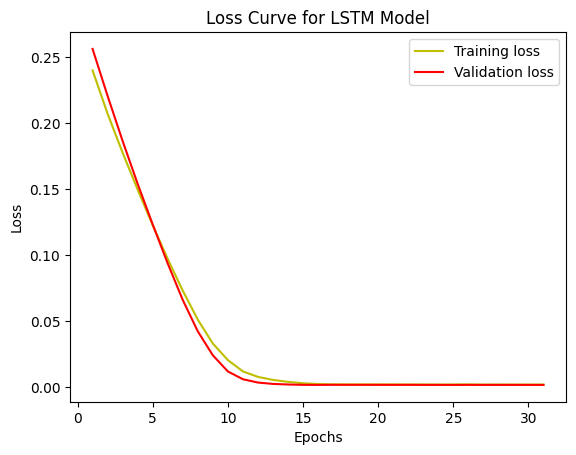

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss Curve for LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Loss Curve for LSTM Model.jpg')
plt.legend()
plt.show()

In [46]:
test_x = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #[samples, timesteps, features]

### Make Predictions

In [47]:
test_predict = model.predict(test_x)
test_predict

4/4 [==============================] - 0s 3ms/step


array([[0.3778405 ],
       [0.37686405],
       [0.3919153 ],
       [0.43962258],
       [0.49541703],
       [0.53974867],
       [0.541036  ],
       [0.54464614],
       [0.544758  ],
       [0.55540144],
       [0.55499524],
       [0.54014766],
       [0.510918  ],
       [0.47968322],
       [0.4541515 ],
       [0.4440771 ],
       [0.41671252],
       [0.38368085],
       [0.36347497],
       [0.36651805],
       [0.36677536],
       [0.36273396],
       [0.37152496],
       [0.384775  ],
       [0.39073825],
       [0.3983311 ],
       [0.39648113],
       [0.39272475],
       [0.37564936],
       [0.36553758],
       [0.3474843 ],
       [0.33107835],
       [0.32511103],
       [0.3242231 ],
       [0.34936643],
       [0.36623746],
       [0.355241  ],
       [0.32197183],
       [0.2963085 ],
       [0.2942119 ],
       [0.29550776],
       [0.30369204],
       [0.30541876],
       [0.31558943],
       [0.3148495 ],
       [0.31548727],
       [0.30351156],
       [0.275

### Rescale all the observations

In [48]:
test_predict = scaler.inverse_transform(test_predict)
x_train1 = scaler.inverse_transform(x_train)
y_train1 = scaler.inverse_transform(y_train)
x_test1 = scaler.inverse_transform(x_test)
y_test1 = scaler.inverse_transform(y_test)

In [49]:
test_predict

array([[1787.4873],
       [1787.0723],
       [1793.4697],
       [1813.7471],
       [1837.462 ],
       [1856.3048],
       [1856.852 ],
       [1858.3865],
       [1858.4338],
       [1862.9578],
       [1862.7852],
       [1856.4744],
       [1844.0507],
       [1830.7747],
       [1819.9226],
       [1815.6405],
       [1804.0096],
       [1789.9697],
       [1781.3813],
       [1782.6748],
       [1782.7843],
       [1781.0664],
       [1784.8029],
       [1790.4348],
       [1792.9695],
       [1796.1967],
       [1795.4103],
       [1793.8138],
       [1786.556 ],
       [1782.258 ],
       [1774.5846],
       [1767.6116],
       [1765.0752],
       [1764.6978],
       [1775.3848],
       [1782.5557],
       [1777.8816],
       [1763.741 ],
       [1752.833 ],
       [1751.9418],
       [1752.4927],
       [1755.9712],
       [1756.7053],
       [1761.0281],
       [1760.7136],
       [1760.9847],
       [1755.8945],
       [1744.1486],
       [1736.0719],
       [1736.3867],


#### Evaluate the model

In [50]:
print('LSTM MAE =', mean_absolute_error(y_test1, test_predict))

LSTM MAE = 12.551690133516882


### Plot real price values and predicted values by LSTM

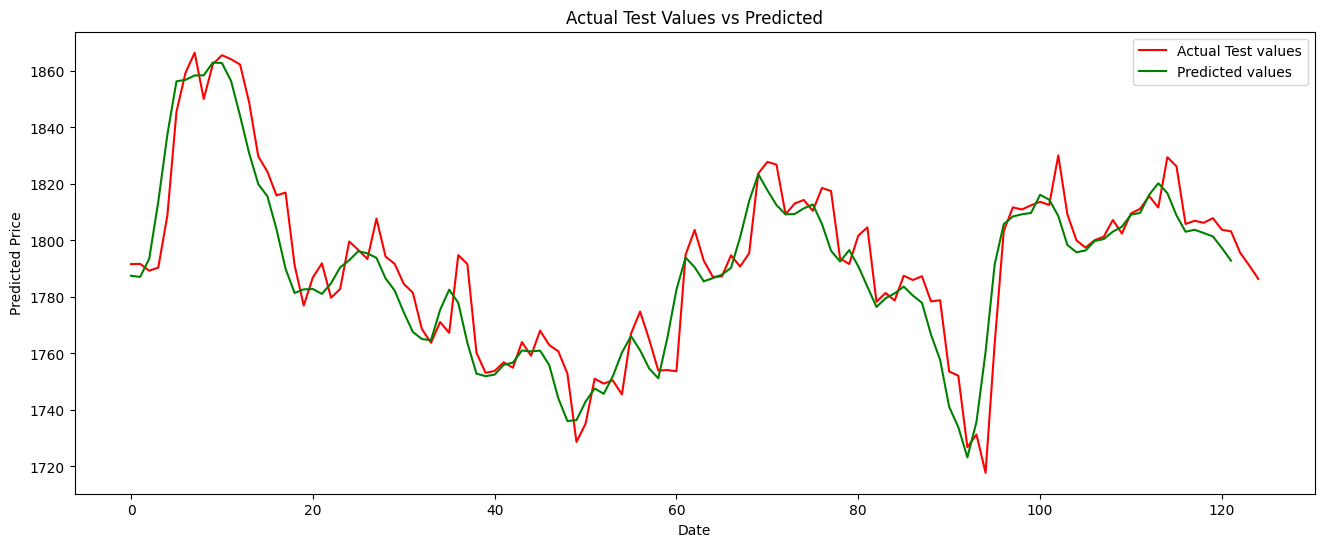

In [51]:
plt.figure(figsize=(16,6))
plt.plot(close_test, color='red', label='Actual Test values')
plt.plot(test_predict , color='green', label='Predicted values')
plt.title('Actual Test Values vs Predicted')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.savefig('LSTM Model Predictins on Test set.jpg')
plt.legend()
plt.show()

[**Back to Top**](#0)